<a href="https://colab.research.google.com/github/AndreaDAlcantara/DS_Portfolio/blob/main/BigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Analysis using BigQuery and LookerStudio**

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
import pandas as pd

Open portfolio on BigQuery.

In [3]:
from google.cloud import bigquery
client = bigquery.Client(project='ds-portfolio-377219')

Run a query on BigQuery and save into a Pandas dataframe.

In [11]:
sample_count = 2000
row_count = client.query('''
  SELECT 
    COUNT(*) as total
  FROM `bigquery-public-data.covid19_public_forecasts.county_14d`''').to_dataframe().total[0]

df = client.query('''
  SELECT
    *
  FROM
    `bigquery-public-data.covid19_public_forecasts.county_14d`
  WHERE RAND() < %d/%d
''' % (sample_count, row_count)).to_dataframe()

print('Full dataset has %d rows' % row_count)

Full dataset has 132888 rows


In [12]:
df.head()

,county_fips_code,county_name,state_name,forecast_date,prediction_date,new_confirmed,cumulative_confirmed,new_confirmed_7day_rolling,new_deaths,cumulative_deaths,new_deaths_7day_rolling,hospitalized_patients,recovered,new_confirmed_ground_truth,cumulative_confirmed_ground_truth,new_deaths_ground_truth,cumulative_deaths_ground_truth,hospitalized_patients_ground_truth,recovered_documented_ground_truth,county_population
0,19079,Hamilton,Iowa,2022-02-05,2022-01-27,NaN,NaN,1095.285714,NaN,NaN,4.571429,NaN,NaN,0.0,3254.0,0.0,65.0,NaN,NaN,14773
1,33013,Merrimack,New Hampshire,2022-02-05,2022-01-27,NaN,NaN,267.142857,NaN,NaN,1.857143,NaN,NaN,206.0,28410.0,2.0,201.0,NaN,NaN,151391
2,36061,New York,New York,2022-02-05,2022-01-27,NaN,NaN,1752.285714,NaN,NaN,16.857143,NaN,NaN,1190.0,389214.0,20.0,5138.0,NaN,NaN,1628706
3,21067,Fayette,Kentucky,2022-02-05,2022-01-27,NaN,NaN,184.571429,NaN,NaN,0.571429,NaN,NaN,777.0,83175.0,0.0,502.0,NaN,NaN,323152
4,48451,Tom Green,Texas,2022-02-05,2022-01-27,NaN,NaN,1739.428571,NaN,NaN,0.571429,NaN,NaN,260.0,39269.0,1.0,406.0,NaN,NaN,119200


Create new dataframe with meaningful columns to work with.

In [20]:
df_covid = df[['county_name','state_name','forecast_date','prediction_date','new_confirmed_ground_truth','cumulative_confirmed_ground_truth','new_deaths_ground_truth','cumulative_deaths_ground_truth','county_population']]
df_covid

,county_name,state_name,forecast_date,prediction_date,new_confirmed_ground_truth,cumulative_confirmed_ground_truth,new_deaths_ground_truth,cumulative_deaths_ground_truth,county_population
0,Hamilton,Iowa,2022-02-05,2022-01-27,0.0,3254.0,0.0,65.0,14773
1,Merrimack,New Hampshire,2022-02-05,2022-01-27,206.0,28410.0,2.0,201.0,151391
2,New York,New York,2022-02-05,2022-01-27,1190.0,389214.0,20.0,5138.0,1628706
3,Fayette,Kentucky,2022-02-05,2022-01-27,777.0,83175.0,0.0,502.0,323152
4,Tom Green,Texas,2022-02-05,2022-01-27,260.0,39269.0,1.0,406.0,119200
...,...,...,...,...,...,...,...,...,...
1944,Oakland,Michigan,2022-02-05,2022-02-18,NaN,NaN,NaN,NaN,1257584
1945,Humacao,Puerto Rico,2022-02-05,2022-02-18,NaN,NaN,NaN,NaN,<NA>
1946,Ford,Illinois,2022-02-05,2022-02-18,NaN,NaN,NaN,NaN,12961
1947,Allegany,New York,2022-02-05,2022-02-18,NaN,NaN,NaN,NaN,46091


In [21]:
!pip install pandasql 
from pandasql import sqldf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=db3d5204bc240a60af0cdfb8f1915e8516a2c485821e402288ec12109419b73f
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [22]:
covid = sqldf("SELECT * FROM df_covid WHERE cumulative_confirmed_ground_truth/county_population > 0.5")
covid

,county_name,state_name,forecast_date,prediction_date,new_confirmed_ground_truth,cumulative_confirmed_ground_truth,new_deaths_ground_truth,cumulative_deaths_ground_truth,county_population
0,Yakutat city and borough,Alaska,2022-02-05,2022-01-14,24.0,390.0,0.0,4.0,579
1,Loving,Texas,2022-02-05,2022-01-24,4.0,89.0,0.0,0.0,169


Create new spreadsheet on Google Sheets in order to work with it on Looker Studio.

In [24]:
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

from gspread_dataframe import set_with_dataframe

title = 'Covid'
gc.create(title)  # if not exist
sheet = gc.open(title).sheet1
set_with_dataframe(sheet, df_covid) 

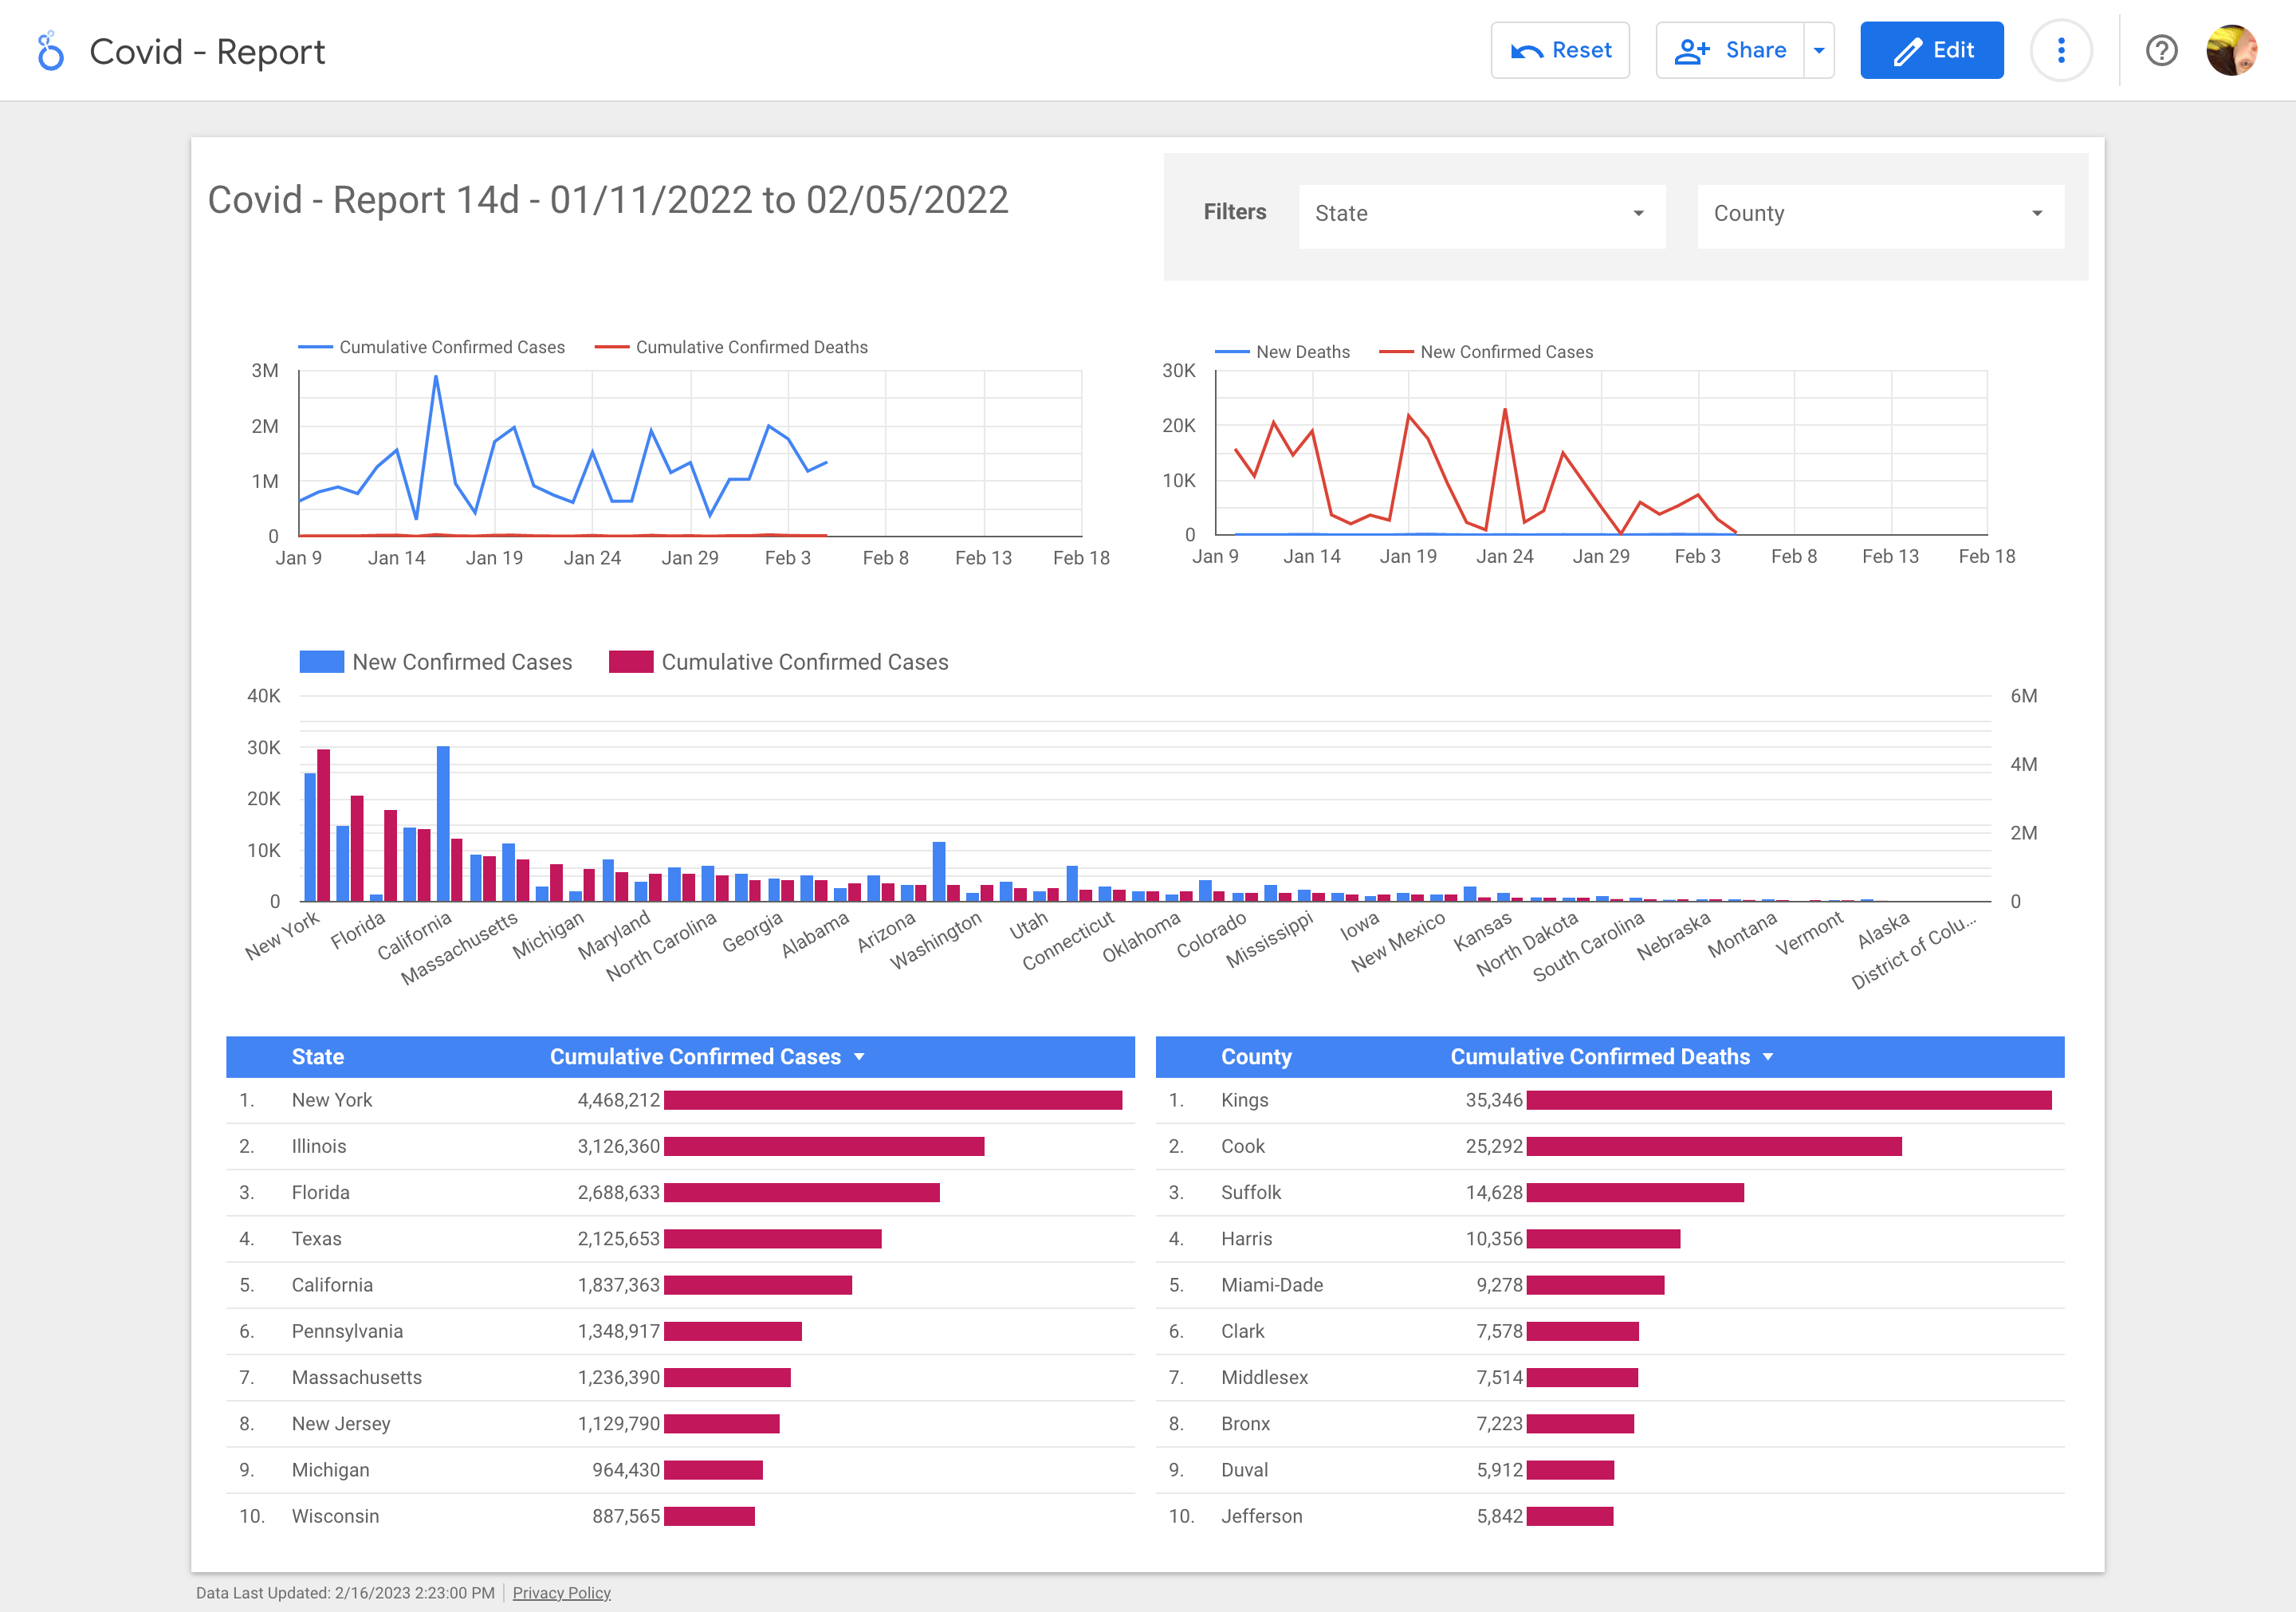

[Link to the Looker Studio Report](https://lookerstudio.google.com/s/uZVgR4KFdbI)